In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pandas as pd
from tqdm import tqdm
import datetime
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../../data/Complete_Housing_set.csv").drop("Unnamed: 0", axis=1) # Drop random column

In [4]:
# Look at possible features
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 1.) Data Cleaning

In [5]:
# No outliers were found in the data, so we check for null values now, then drop them
print("Count of Null values:")
for col in df.columns:
    b = df[col].isna().sum()
    if b > 0:
        print("\t"+col+": "+str(b))
cleaned_df = df.dropna()

# Convert date to datetime format, then create a new column with age of house
current_year = datetime.datetime.now().year
house_date = cleaned_df["yr_built"]
cleaned_df["house_age"] = current_year - house_date

# Drop useless columns
unhelpful_features = ["date","id"]
cleaned_df.drop(unhelpful_features, axis=1, inplace=True)

Count of Null values:
	bedrooms: 13
	bathrooms: 10


## 2.) Linear Regression

In [6]:
# Initial regression was performed using most of the features except the date (unusable) and id (tied to individual properties)
X = cleaned_df.drop("price", axis=1)
Y = cleaned_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.4, random_state=42) # Split
scale = StandardScaler()
X_scaled = scale.fit_transform(X_train) # Normalize
lr = LinearRegression()
lr.fit(X_scaled, y_train) # Fit Model

LinearRegression()

In [7]:
# Test
X_test_scaled = scale.transform(X_test) # normalize test set
ytest_pred = lr.predict(X_test_scaled) # predict on test set
mae_test = mean_absolute_error(y_test, ytest_pred)
mse_test = mean_squared_error(y_test, ytest_pred, squared= True)
r2_test = r2_score(y_test, ytest_pred)
print("Mean absolute error: "+str(mae_test)+"; Mean squared error: "+str(mse_test)+"; R2 score is: "+str(r2_test))

Mean absolute error: 124543.30627182996; Mean squared error: 43933635691.52772; R2 score is: 0.6867840722358516


In [8]:
#Train
ytrain_pred = lr.predict(X_scaled) # Predict on training set
mae_train = mean_absolute_error(y_train, ytrain_pred)
mse_train = mean_squared_error(y_train, ytrain_pred, squared= True)
r2_train = r2_score(y_train, ytrain_pred)
print("Mean absolute error: "+str(mae_train)+"; Mean squared error: "+str(mse_train)+"; R2 score is: "+str(r2_train))

Mean absolute error: 125060.67042667916; Mean squared error: 38274016003.45249; R2 score is: 0.7081010546768695


## 3.) Linear Regression Optimization

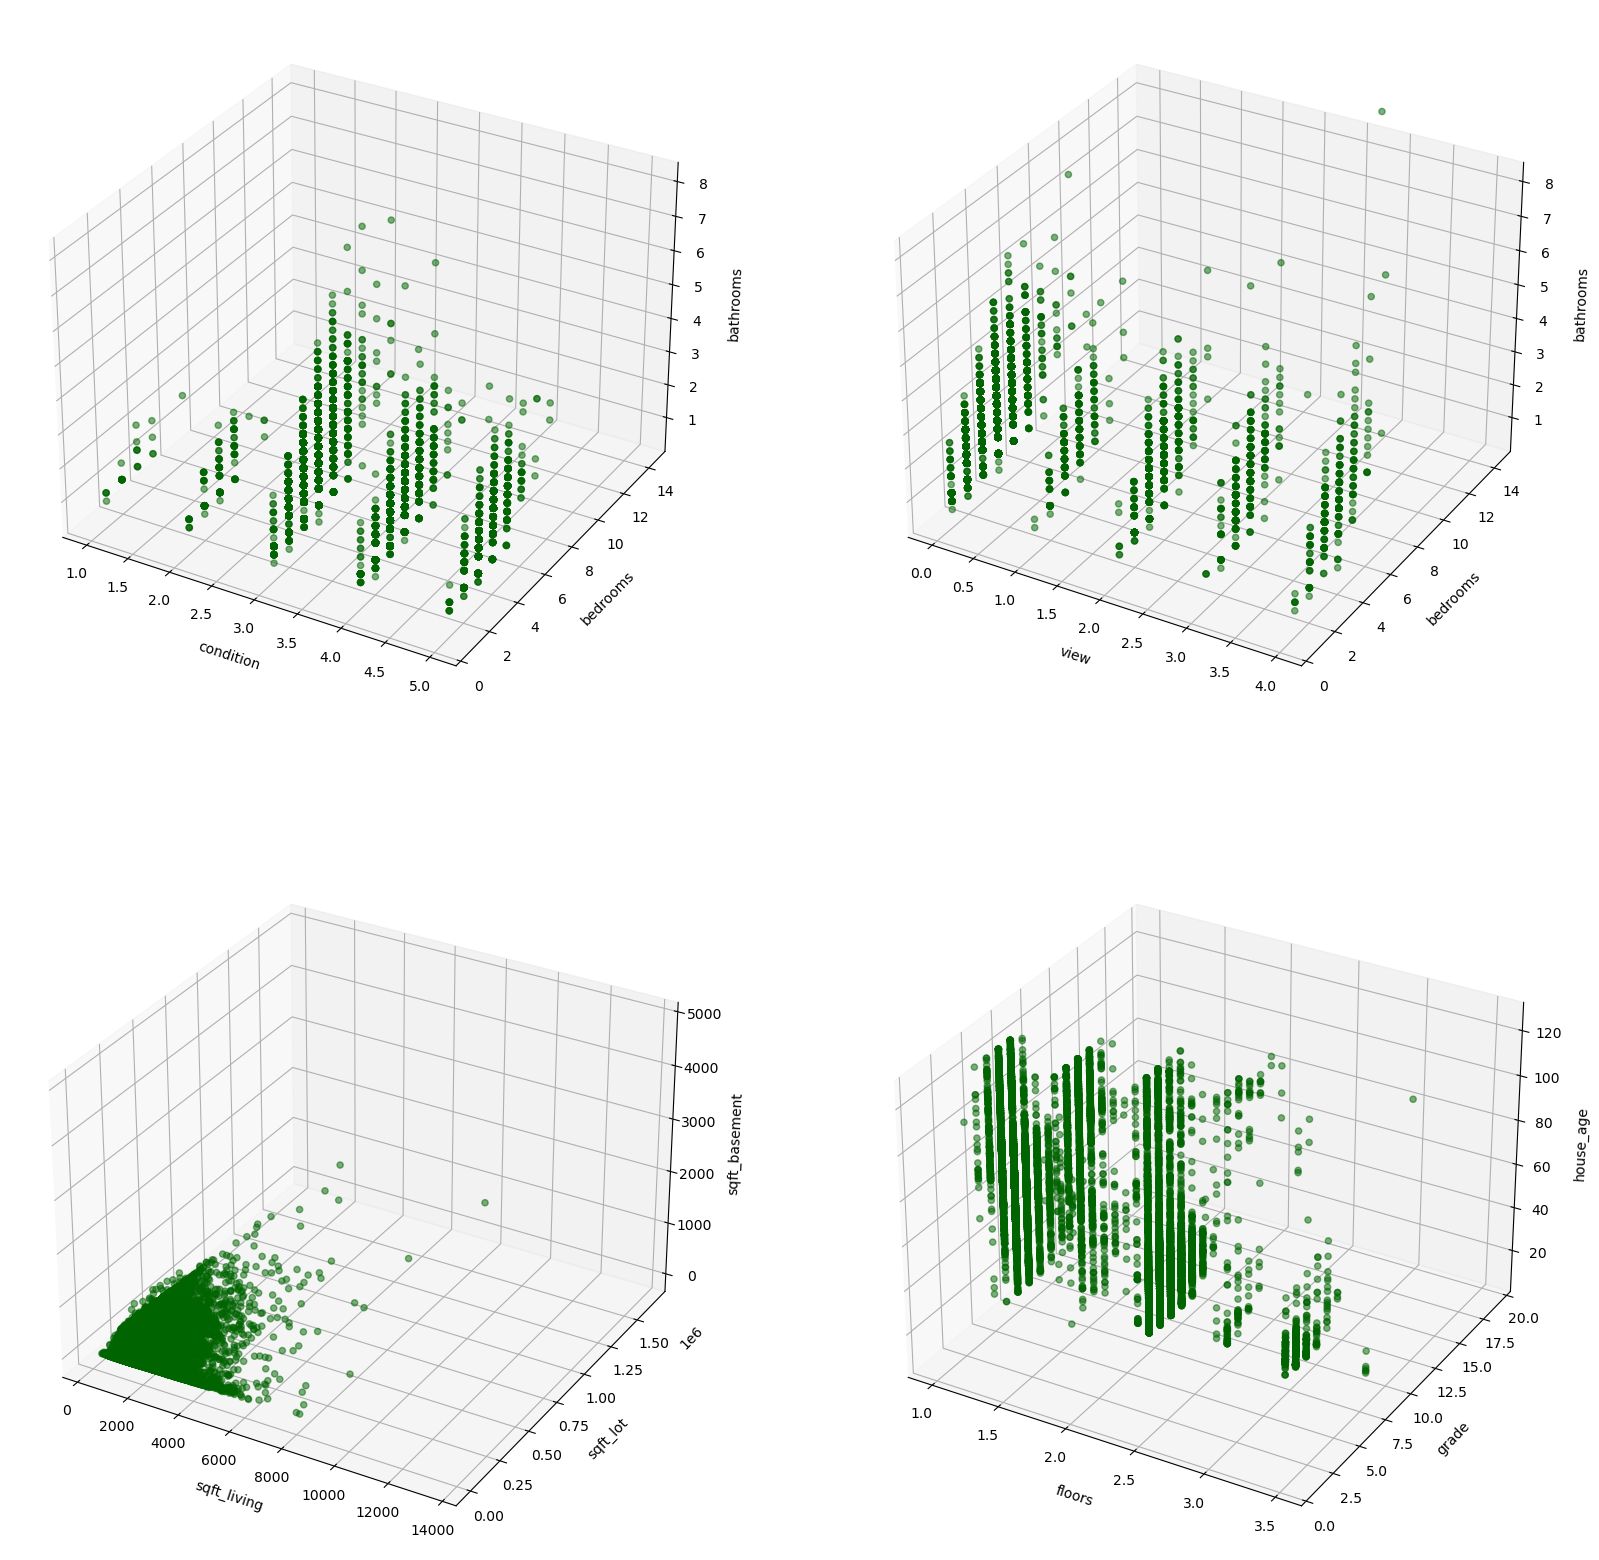

In [9]:
# 3D plots for understanding trends in groups of features

fig=plt.figure(figsize=(20,20))

ax=fig.add_subplot(2,2,1,projection='3d')
ax.scatter(cleaned_df['condition'],cleaned_df['bedrooms'],cleaned_df['bathrooms'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\ncondition',ylabel='\nbedrooms',zlabel='\nbathrooms')
ax.set(ylim=[0,15]);

ax=fig.add_subplot(2,2,2,projection='3d')
ax.scatter(cleaned_df['view'],cleaned_df['bedrooms'],cleaned_df['bathrooms'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nview',ylabel='\nbedrooms',zlabel='\nbathrooms')
ax.set(ylim=[0,15]);

ax=fig.add_subplot(2,2,3,projection='3d')
ax.scatter(cleaned_df['sqft_living'],cleaned_df['sqft_lot'],cleaned_df['sqft_basement'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft_living',ylabel='\nsqft_lot',zlabel='\nsqft_basement');

ax=fig.add_subplot(2,2,4,projection='3d')
ax.scatter(cleaned_df['floors'],cleaned_df['grade'],cleaned_df['house_age'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nfloors',ylabel='\ngrade',zlabel='\nhouse_age')
ax.set(ylim=[0,20]);

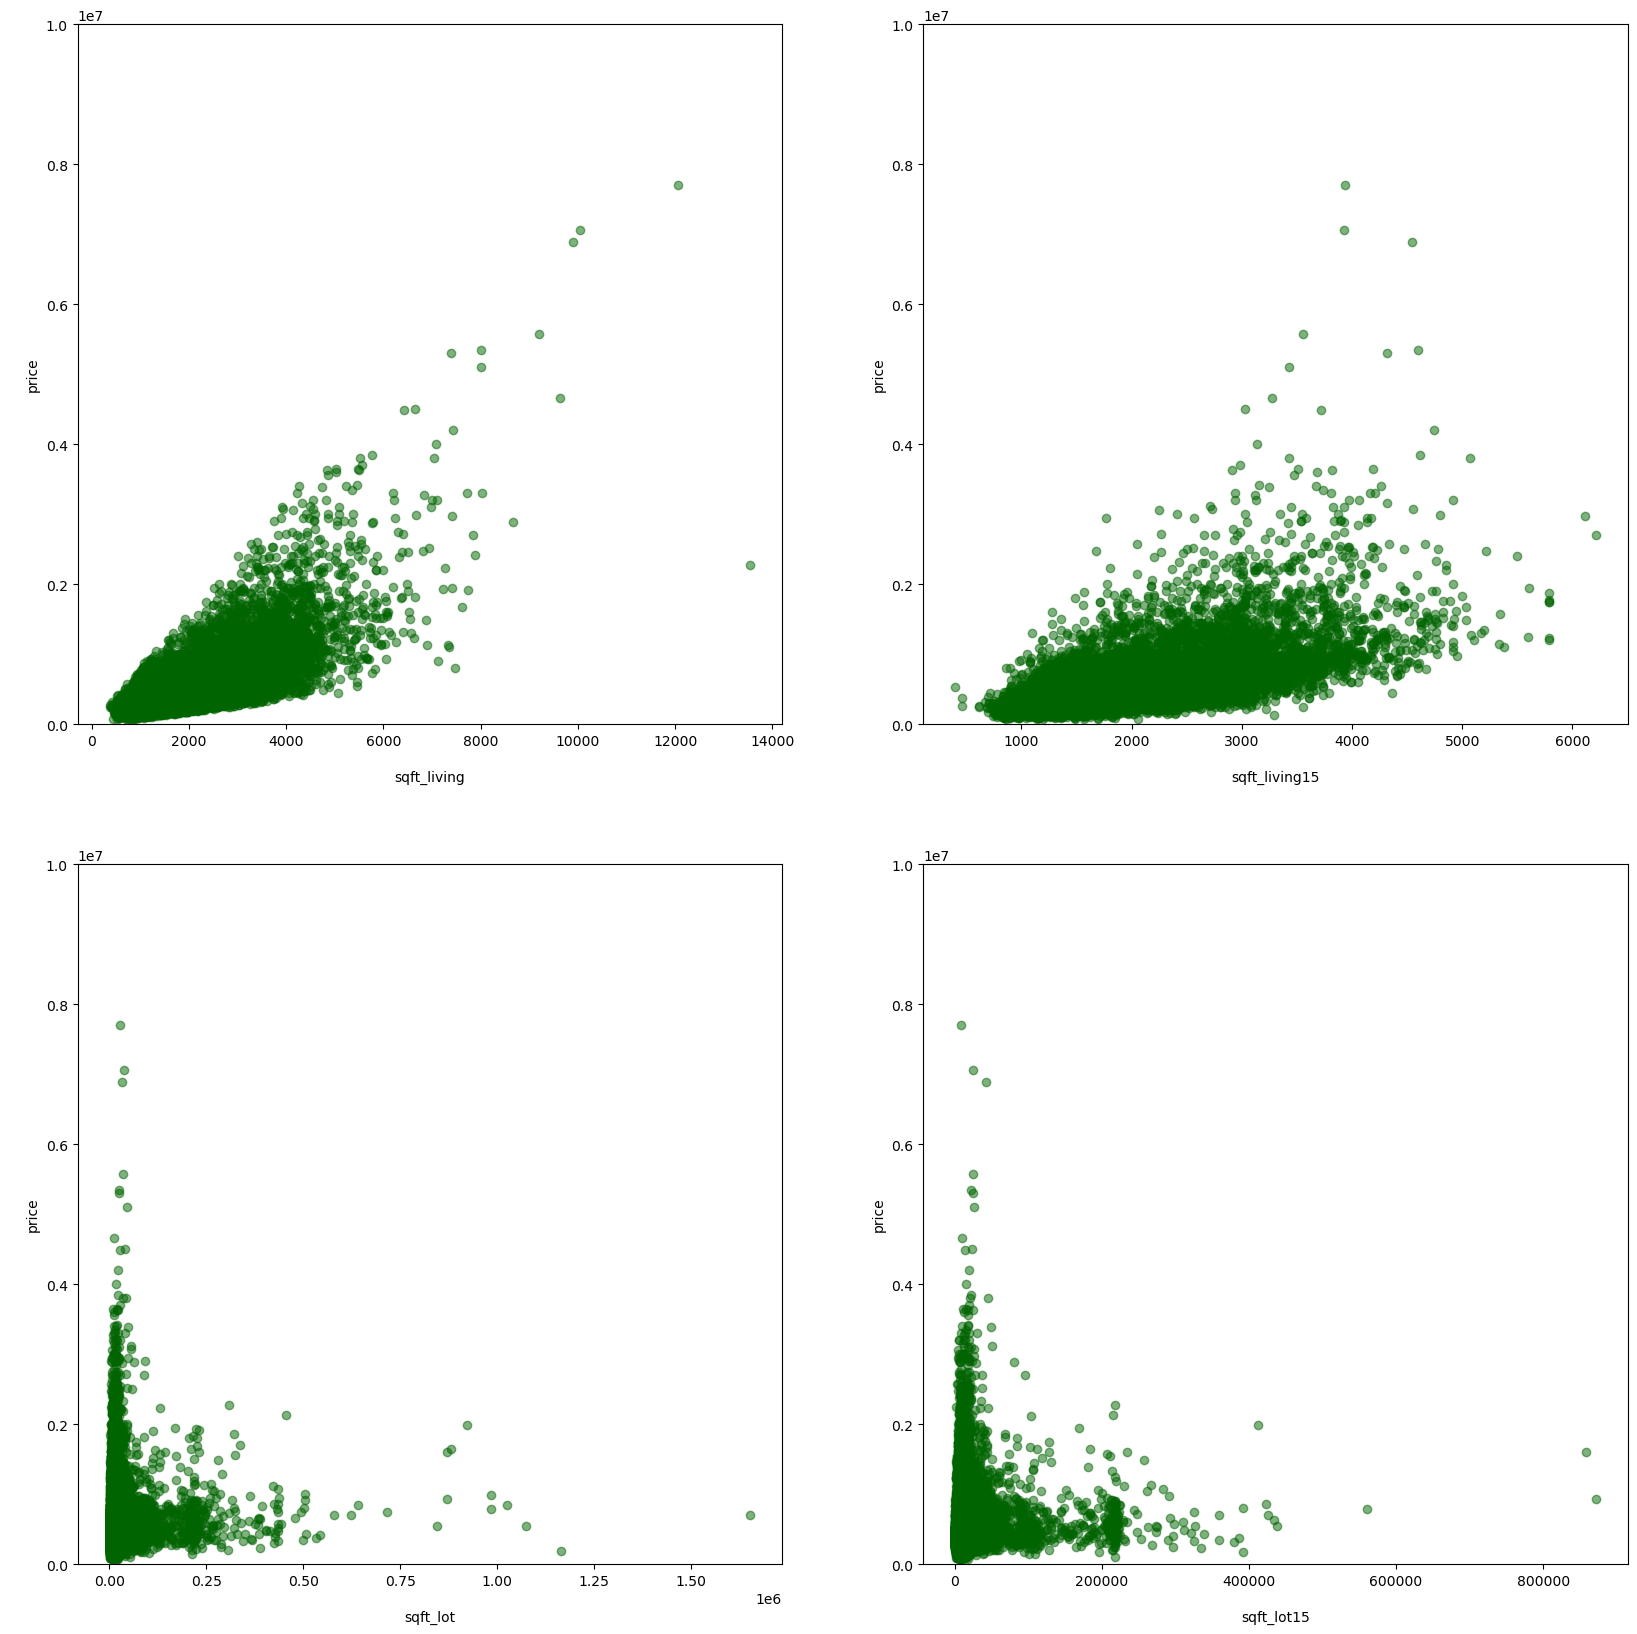

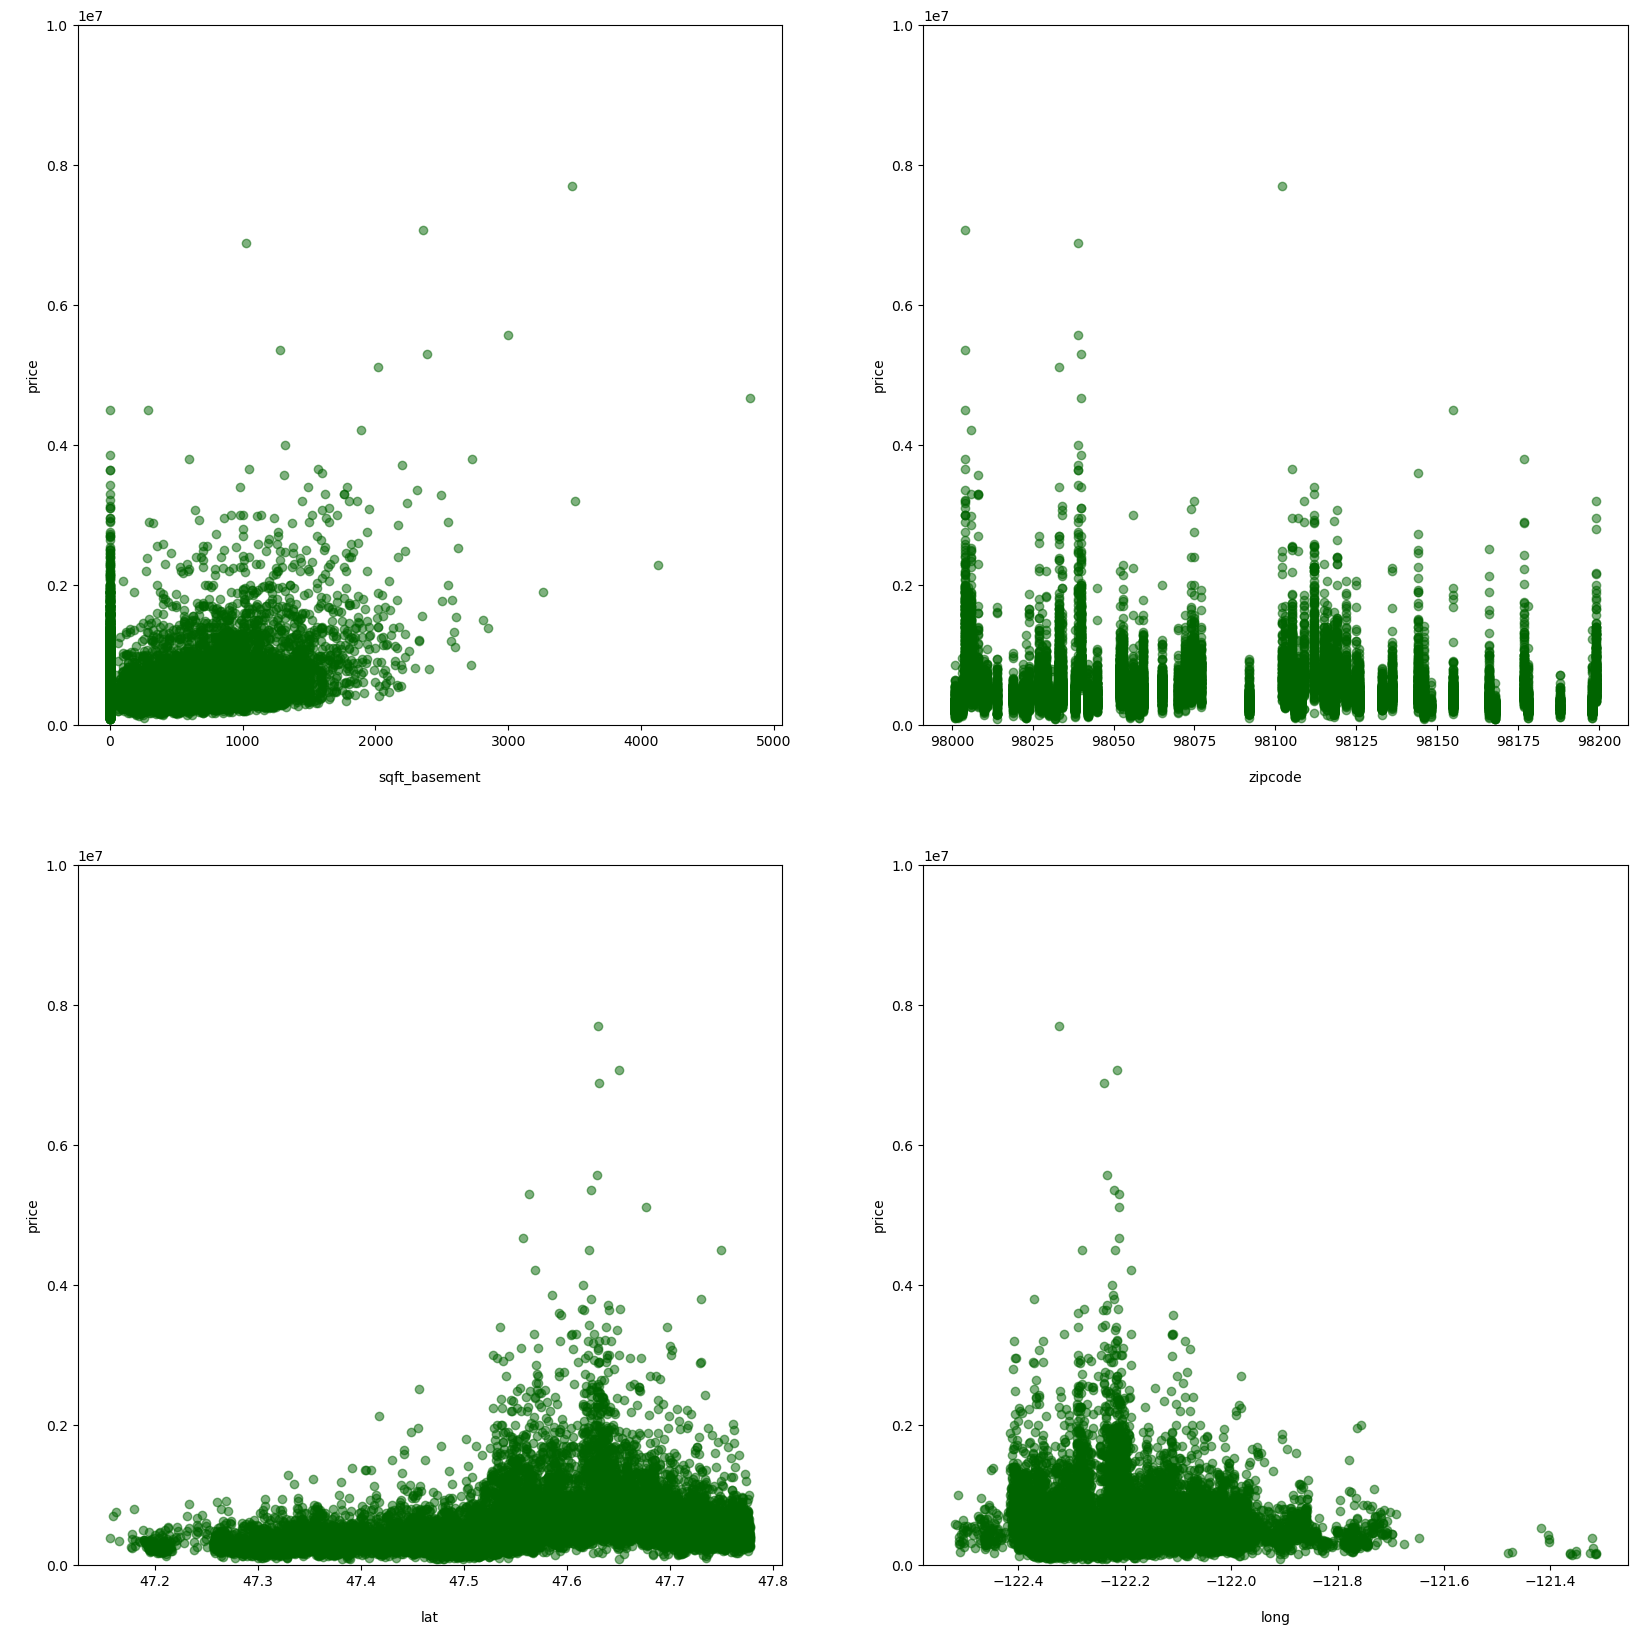

In [10]:
# 2D plots for understanding individual feature trends against price

fig=plt.figure(figsize=(20,20))

ax=fig.add_subplot(2,2,1)
ax.scatter(cleaned_df['sqft_living'],cleaned_df['price'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft_living',ylabel='\nprice')
ax.set(ylim=[0,10000000]);

ax=fig.add_subplot(2,2,2)
ax.scatter(cleaned_df['sqft_living15'],cleaned_df['price'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft_living15',ylabel='\nprice')
ax.set(ylim=[0,10000000]);

ax=fig.add_subplot(2,2,3)
ax.scatter(cleaned_df['sqft_lot'],cleaned_df['price'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft_lot',ylabel='\nprice')
ax.set(ylim=[0,10000000]);

ax=fig.add_subplot(2,2,4)
ax.scatter(cleaned_df['sqft_lot15'],cleaned_df['price'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft_lot15',ylabel='\nprice')
ax.set(ylim=[0,10000000]);

fig2=plt.figure(figsize=(20,20)) # 2nd plot
ax=fig2.add_subplot(2,2,1)
ax.scatter(cleaned_df['sqft_basement'],cleaned_df['price'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft_basement',ylabel='\nprice')
ax.set(ylim=[0,10000000]);

ax=fig2.add_subplot(2,2,2)
ax.scatter(cleaned_df['zipcode'],cleaned_df['price'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nzipcode',ylabel='\nprice')
ax.set(ylim=[0,10000000]);

ax=fig2.add_subplot(2,2,3)
ax.scatter(cleaned_df['lat'],cleaned_df['price'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nlat',ylabel='\nprice')
ax.set(ylim=[0,10000000]);

ax=fig2.add_subplot(2,2,4)
ax.scatter(cleaned_df['long'],cleaned_df['price'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nlong',ylabel='\nprice')
ax.set(ylim=[0,10000000]);

In [11]:
def getRValues(X:list,Y:list,r:int, t:float):
    """
    Splits the date into testing and training set, then performs a basic multilinear regression
    :return: r^2 values for the testing and training set
    """
    
    # Split and train
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = t, random_state=r) # Split
    scale = StandardScaler()
    X_scaled = scale.fit_transform(X_train) # Normalize
    lr = LinearRegression()    
    lr.fit(X_scaled, y_train) # Fit model
    
    # Predictions
    
    # Test
    X_test_scaled = scale.transform(X_test)
    ytest_pred = lr.predict(X_test_scaled)
    r2_test = r2_score(y_test, ytest_pred)
    
    #Train
    ytrain_pred = lr.predict(X_scaled)
    r2_train = r2_score(y_train, ytrain_pred)
    
    return r2_test,r2_train

In [12]:
def best_parameters(X:list,Y:list):
    """
    This function performs a brute force operation to find the best parameters for a mulitlinear regression 
    :return: the best parameters: r^2 for the test set, random state, and test size 
    """
    R = 0
    rs = 0
    ts = 0
    # Average 5 seconds
    for ran in tqdm(range(150)): # Iterates though different random state and test size for best R value 
        for tes in range(10,80,5):
            r1,r2 = getRValues(X,Y,ran,tes/100)
            if r1 > R:
                R = r1
                rs = ran
                ts = tes
                #print("R: "+str(R)+"; Random State: "+str(rs)+"; Test Size: "+str(ts/100))
    return R,rs,ts

In [13]:
# After research and plot exploration, we have chosen the best features to be used
X_opt = cleaned_df.drop(["price","yr_built","yr_renovated","sqft_lot15","sqft_living15"],axis=1)
Y_opt = cleaned_df["price"]
R,rs,ts = best_parameters(X_opt,Y_opt)
print("Best R: "+str(R)+"; Best random state: "+str(rs)+"; Best test size: "+str(ts/100))

100%|██████████| 150/150 [00:39<00:00,  3.83it/s]

Best R: 0.7370892377226714; Best random state: 145; Best test size: 0.1


## 4.) Evaluation of Regression Model

In [14]:
# We rerun the model with best parameters (thanks to random state) to further evaluate

X_train, X_test, y_train, y_test = train_test_split(X_opt,Y_opt, test_size = ts/100, random_state=rs) # Split
scale = StandardScaler()
X_scaled = scale.fit_transform(X_train) # Normalize
model = LinearRegression()
model.fit(X_scaled, y_train) # Fit Model

# Test
X_scaled = scale.transform(X_test) # normalize test set
y_pred = model.predict(X_scaled) # predict on test set

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred, squared= True)
r2 = r2_score(y_test, y_pred)

# manual calculations
coefs = pd.DataFrame(zip(X.columns, model.coef_)) # Coefficents for the model

RSS = np.sum(np.square(np.array(y_test) - np.array(y_pred)))
resid_std_error = math.sqrt(RSS / (len(y_test) - 2)) # Residual Standard Error

SSR = sum((y_test-y_pred)**2)        # Sum of squares error
SST = sum((y_test-np.mean(y_test))**2)    # Sum of squares due to regression
r_squared = 1 - (float(SSR))/SST  # R^2
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_opt.shape[1]-1) # Adjusted R^2 

print("Mean absolute error: "+str(mae_test))
print("Mean squared error: "+str(mse_test))
print("R2 score is: "+str(r2_test))
print("Residual standard error: "+str(resid_std_error))
print("Sum of Squares error: "+str(SSR))
print("Sum of squares due to regression: "+str(SST))
print("Adjusted R squared: "+str(adjusted_r_squared))
print(coefs)

LinearRegression()

Mean absolute error: 124543.30627182996
Mean squared error: 43933635691.52772
R2 score is: 0.6867840722358516
Residual standard error: 187247.79516151853
Sum of Squares error: 75663227998970.34
Sum of squares due to regression: 287790531447157.3
Adjusted R squared: 0.7352498433970347
                0              1
0        bedrooms  -33263.700090
1       bathrooms   33014.986643
2     sqft_living   85423.433341
3        sqft_lot   -2147.788604
4          floors    3246.256857
5      waterfront   50172.339655
6            view   42727.678844
7       condition   15746.709450
8           grade  116417.316433
9      sqft_above   79979.006745
10  sqft_basement   27373.347404
11       yr_built  -31172.054569
12   yr_renovated   83654.012638
13        zipcode  -28465.964381
14            lat   80749.065959


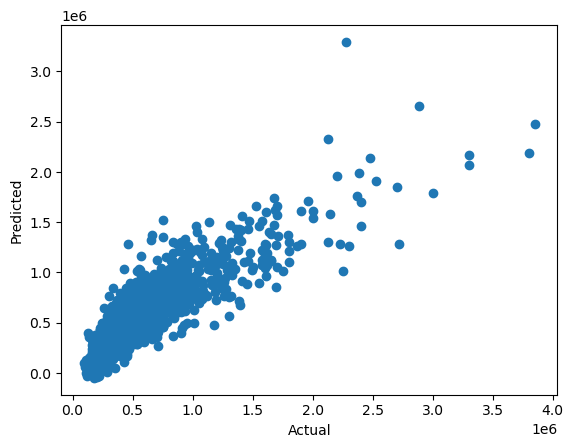

In [15]:
# Scatter plot of predictions
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

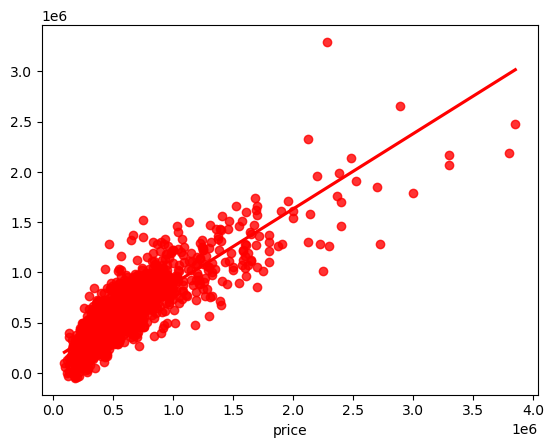

In [16]:
# Trend line of predictions
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');